<a href="https://colab.research.google.com/github/Sidd-2906/Computer-Vision/blob/main/Style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.11.0'

In [ ]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [ ]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
len(network.layers)

22

In [ ]:
content_image = tf.keras.preprocessing.image.load_img('/content/WhatsApp Image 2022-11-16 at 6.42.31 PM.jpeg')

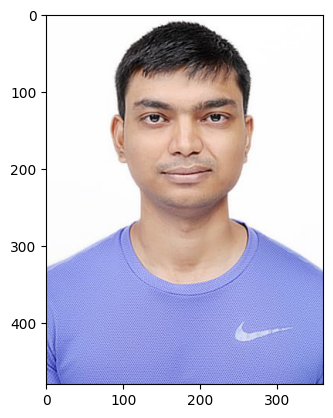

In [ ]:
plt.imshow(content_image);

In [ ]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [ ]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (480, 360, 3), 0.0, 255.0)

In [ ]:
content_image = content_image / 255

In [ ]:
content_image.min(), content_image.max()

(0.0, 1.0)

In [ ]:
content_image


array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.5411765 , 0.5803922 , 0.9137255 ],
        [0.5529412 , 0.5921569 , 0.9254902 ],
        [0.5019608 , 0

In [ ]:
content_image = content_image[tf.newaxis, :]

In [ ]:
content_image.shape

(1, 480, 360, 3)

In [ ]:
style_image = tf.keras.preprocessing.image.load_img('/content/siddphoto.jpeg')

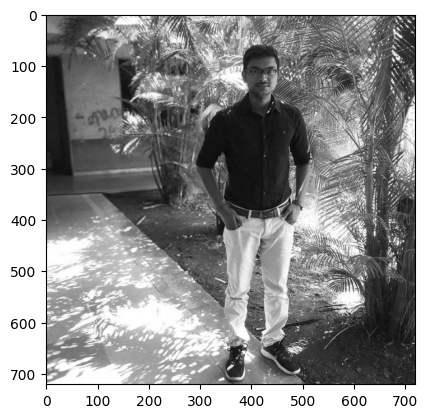

In [ ]:
plt.imshow(style_image);

In [ ]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape

(1, 721, 720, 3)

In [ ]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [ ]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)
print(num_content_layers, num_style_layers)

1 5


In [ ]:
[network.get_layer(name).output for name in style_layers]

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [ ]:
network.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)

  return network

In [ ]:
style_extractor = vgg_layers(style_layers)

In [ ]:
style_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
style_extractor.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [ ]:
style_outputs = style_extractor(style_image)

In [ ]:
len(style_outputs)

5

In [ ]:
style_outputs[1]

<tf.Tensor: shape=(1, 360, 360, 128), dtype=float32, numpy=
array([[[[ 0.        ,  0.        ,  0.        , ...,  6.9266315 ,
           0.        , 13.788901  ],
         [ 0.        ,  0.        ,  2.5651617 , ...,  4.686093  ,
           0.        ,  0.46667188],
         [ 0.        ,  0.        ,  2.0750785 , ...,  6.3838615 ,
           0.        ,  1.8738817 ],
         ...,
         [ 0.        ,  0.        ,  2.362609  , ...,  7.030668  ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  2.1047688 , ...,  8.226186  ,
           0.        ,  1.7408279 ],
         [ 0.        ,  0.        ,  7.0371103 , ..., 14.395984  ,
           0.        ,  0.        ]],

        [[ 0.        ,  2.798277  ,  0.        , ...,  5.8018303 ,
           0.        , 13.185794  ],
         [ 0.        ,  2.6247551 ,  0.        , ...,  0.91367245,
           0.        ,  0.        ],
         [ 0.        ,  2.2158697 ,  0.        , ...,  3.9302278 ,
           0.5735036 ,  0

In [ ]:
style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape, style_outputs[4].shape

(TensorShape([1, 721, 720, 64]),
 TensorShape([1, 360, 360, 128]),
 TensorShape([1, 180, 180, 256]),
 TensorShape([1, 90, 90, 512]),
 TensorShape([1, 45, 45, 512]))

In [ ]:
def gram_matrix(layer_activation):
  result = tf.linalg.einsum('bijc,bijd->bcd', layer_activation, layer_activation)
  input_shape = tf.shape(layer_activation)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)

  return result / num_locations

In [ ]:
style_outputs[0]

<tf.Tensor: shape=(1, 721, 720, 64), dtype=float32, numpy=
array([[[[0.        , 0.22937274, 0.24605723, ..., 0.438002  ,
          0.6287171 , 0.5382987 ],
         [0.        , 0.3526753 , 0.62446064, ..., 0.05664742,
          1.7052456 , 1.7059743 ],
         [0.        , 0.35213536, 0.6247976 , ..., 0.06040311,
          1.7025002 , 1.7077577 ],
         ...,
         [0.33601782, 0.31538862, 0.6422823 , ..., 0.29906404,
          1.5177317 , 1.8107793 ],
         [0.1865766 , 0.3100239 , 0.6132304 , ..., 0.26042998,
          1.4640151 , 1.709372  ],
         [1.3536837 , 0.3967608 , 0.8225104 , ..., 0.64050245,
          2.2661653 , 2.582624  ]],

        [[0.30887476, 0.21286929, 0.        , ..., 0.02372098,
          0.        , 0.        ],
         [1.6181731 , 0.33036035, 0.2580742 , ..., 0.        ,
          0.        , 0.1801234 ],
         [1.6315727 , 0.3290115 , 0.25654137, ..., 0.        ,
          0.        , 0.1784258 ],
         ...,
         [2.1733744 , 0.22656

In [ ]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.6456813 , 0.22456941, 0.23472038, ..., 0.15209313,
         0.37258726, 0.45782053],
        [0.22456941, 0.10522916, 0.10872647, ..., 0.03195057,
         0.15200758, 0.18564995],
        [0.23472038, 0.10872647, 0.11493841, ..., 0.02787141,
         0.16061299, 0.19814941],
        ...,
        [0.15209313, 0.03195057, 0.02787141, ..., 0.12767142,
         0.09940979, 0.09634096],
        [0.37258726, 0.15200758, 0.16061299, ..., 0.09940979,
         0.28896153, 0.32250544],
        [0.45782053, 0.18564995, 0.19814941, ..., 0.09634096,
         0.32250544, 0.38019484]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super().__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    inputs = inputs * 255.0
    # 0 - 1
    # -127.50 - 127.50
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs = outputs[:self.num_style_layers]
    content_outputs = outputs[self.num_style_layers:]

    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

    content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
    style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [ ]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

In [ ]:
results = extractor(content_image)

In [ ]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 60, 45, 512), dtype=float32, numpy=
  array([[[[   0.      ,    0.      ,   51.360718, ...,    0.      ,
             332.81662 ,    0.      ],
           [   0.      ,    0.      ,  221.34976 , ...,    0.      ,
             262.6869  ,    0.      ],
           [   0.      ,    0.      ,  267.26224 , ...,    0.      ,
             422.80228 ,    0.      ],
           ...,
           [   0.      ,    0.      ,  527.6374  , ...,    0.      ,
             301.45572 ,    0.      ],
           [   0.      ,    0.      , 1217.8234  , ...,    0.      ,
             285.2926  ,    0.      ],
           [   0.      ,    0.      ,  780.9311  , ...,   48.336708,
             657.2216  ,    0.      ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  608.2693  ,
             110.15776 ,    0.      ],
           [   0.      ,    0.      ,  247.14914 , ...,  216.90971 ,
               0.      ,    0.      ],
           [   0.      ,    0

In [ ]:
for key, value in results.items():
  print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [ ]:
len(style_targets), len(content_targets)

(5, 1)

In [ ]:
new_image = tf.Variable(content_image)

In [ ]:
content_weight = 1
style_weight = 100

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)

In [ ]:
expected_output = np.array([10000, 15000])
predictions = np.array([8000, 15900])

In [ ]:
np.sum(abs(expected_output - predictions)) / 2

1450.0

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(expected_output, predictions)

1450.0

In [ ]:
mean_squared_error(expected_output, predictions)

2405000.0

In [ ]:
((expected_output - predictions) ** 2).mean()

2405000.0

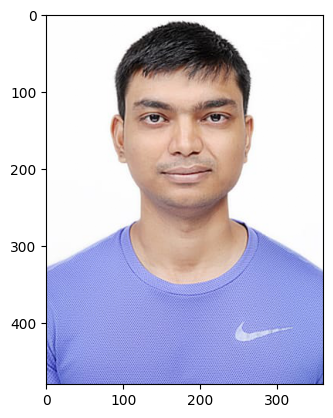

In [ ]:
plt.imshow(tf.squeeze(content_image, axis = 0));

Epoch 500 | content loss: 443986.25 | style loss: 90680760.0 | total loss 1814059264.0


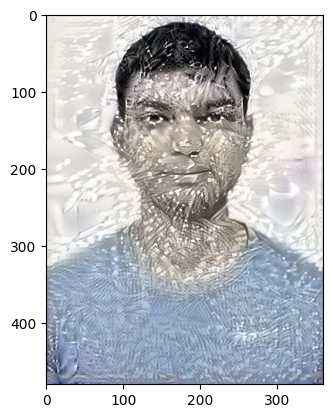

Epoch 1000 | content loss: 454244.75 | style loss: 50539168.0 | total loss 1011237632.0


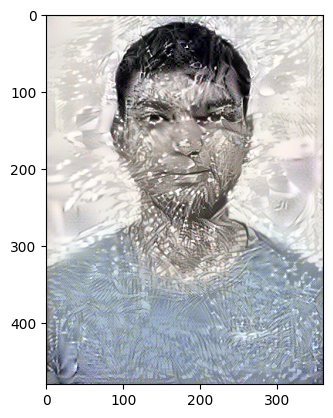

Epoch 1500 | content loss: 462925.1875 | style loss: 41302660.0 | total loss 826516160.0


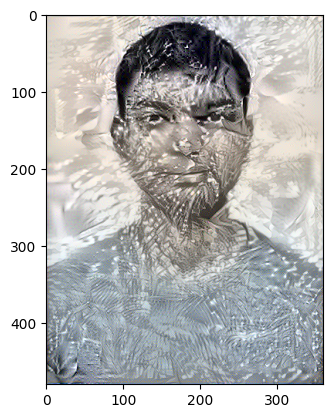

Epoch 2000 | content loss: 460787.5 | style loss: 97404904.0 | total loss 1948558976.0


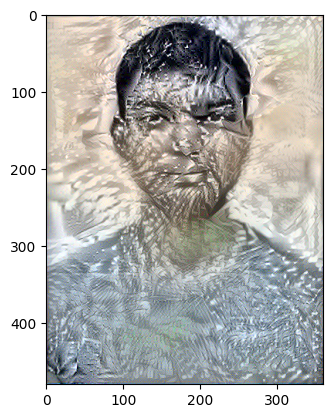

Epoch 2500 | content loss: 470675.25 | style loss: 31113640.0 | total loss 622743488.0


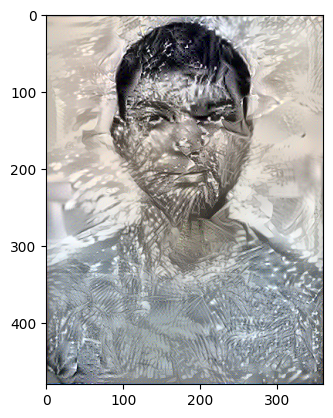

Epoch 3000 | content loss: 461504.84375 | style loss: 129895816.0 | total loss 2598377728.0


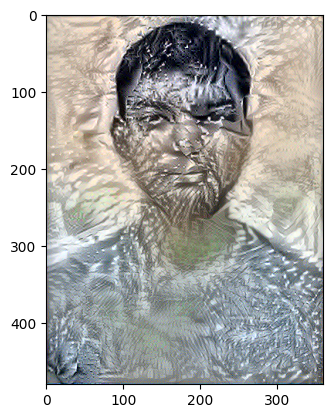

In [ ]:
epochs = 3000
print_every = 500

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

    total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])

  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
    plt.imshow(tf.squeeze(new_image, axis = 0))
    plt.show()

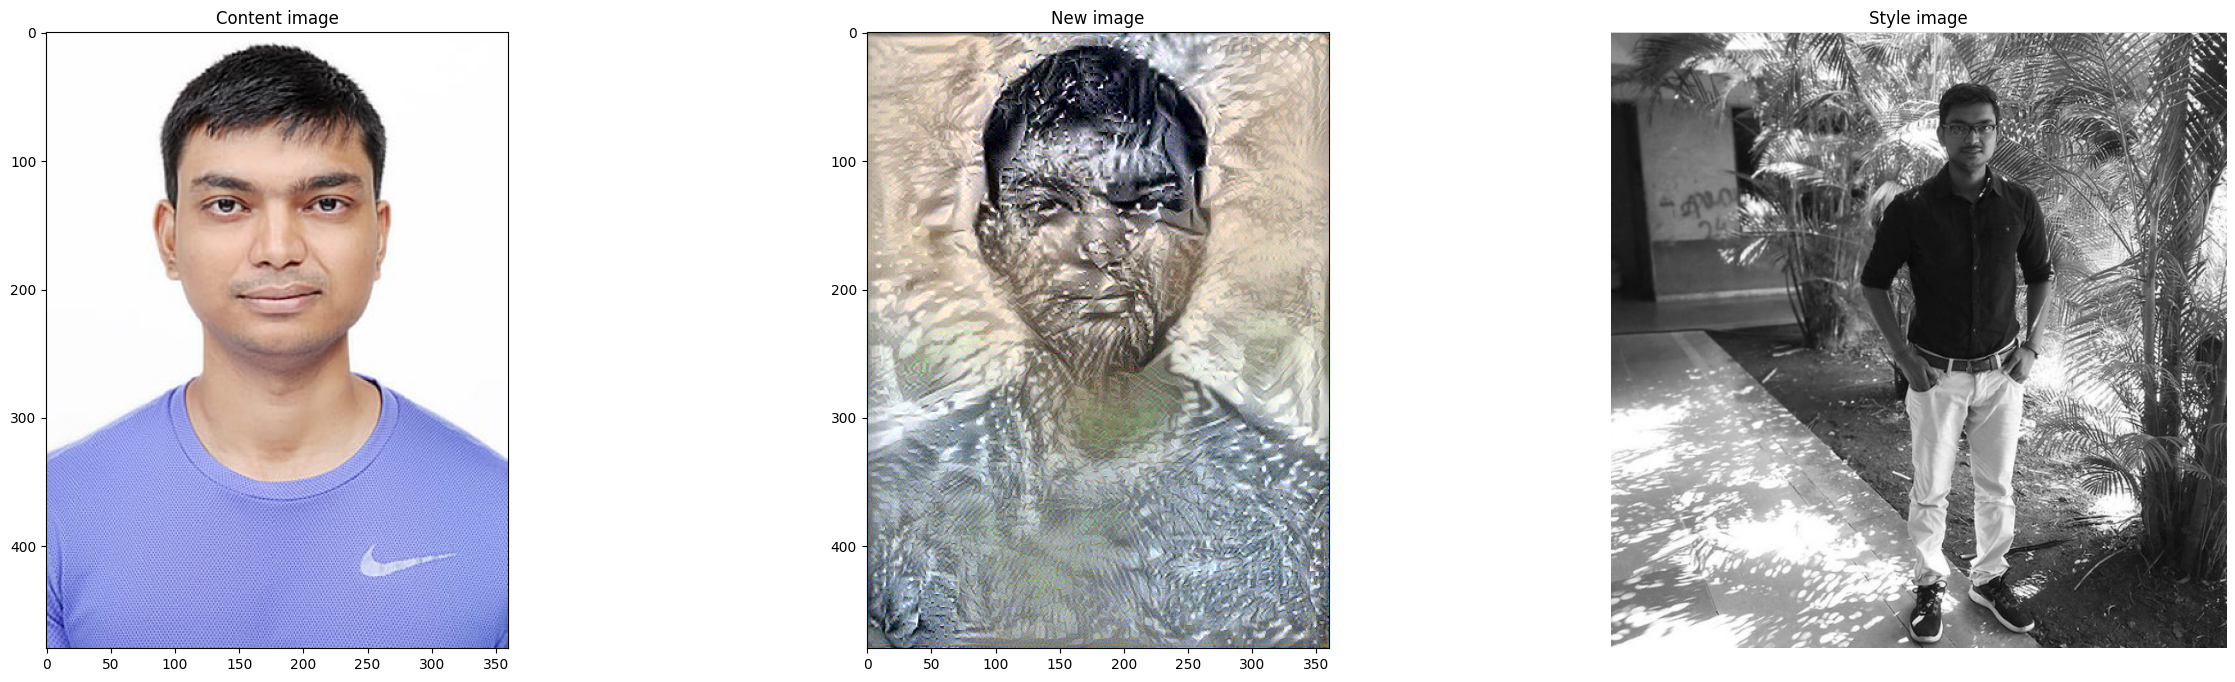

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,8))
ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title('Style image')
plt.axis('off');